100 Prisoners Problem
--------------------------------------
"The director of a prison offers 100 death row prisoners, who are numbered from 1 to 100, a last chance. A room contains a cupboard with 100 drawers. The director randomly puts one prisoner's number in each closed drawer. The prisoners enter the room, one after another. Each prisoner may open and look into 50 drawers in any order. The drawers are closed again afterwards. If, during this search, every prisoner finds his number in one of the drawers, all prisoners are pardoned. If just one prisoner does not find his number, all prisoners die. Before the first prisoner enters the room, the prisoners may discuss strategy—but may not communicate once the first prisoner enters to look in the drawers. What is the prisoners' best strategy?"


https://en.wikipedia.org/wiki/100_prisoners_problem

In [1]:
from matplotlib import pyplot as plt
import random
import seaborn as sns
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML 

Getting Started
----------------------

Probability, and combinatorics especially, can get really complicated. Here, we will use an open-source programming language to simply try different 'strategies' we might use to solve this problem.

Remember, the prisoners can't communicate so the strategy really has to revolve around how prisoners decide which drawers they should open

Lets start by defining some strategies that we can then test in a simulation

<font size="5">Strategy 1 - Open Boxes Randomly</font>
--------------------------------------

First, let's do the naive strategy where each prisoner upon entering the room will simply open random drawer until he/she is out of guesses. To save on computation, as soon as one prisoner fails to find his/her item, the trial will end as a failure

In [3]:
def random_strategy(object_placement, prisoner, nbr_of_objects, nbr_of_guesses):
    prisoner_success = False
    
    guess_order = list(range(nbr_of_objects))
    random.shuffle(guess_order)

    for attempt in range(nbr_of_guesses):

        if prisoner == object_placement[guess_order[attempt]]:
            prisoner_success = True
            break
            
    return prisoner_success

<font size="5">Strategy 2 - Open in Specific Order</font>
--------------------------------------

In the stanard treatment of the problem (100 prisoners, 100 drawers, 50 guesses), each drawer should be opened 50 times to maximize the chances all items are found. If this wasn't the case, the group would be less likely to succeed. For instance, in the extreme case where only the same 50 drawers are checked each time, then the team is guaranteed to loose.

To implement this, prisoner 1 will check drawers 1-50. 

Prisoner 2, drawers 2-51

Prisoner 3, 3-52

and so on

In [4]:
def increment_order_strategy(object_placement, prisoner, nbr_of_objects, nbr_of_guesses):
    prisoner_success = False
    
    for attempt in range(prisoner, nbr_of_guesses + prisoner):
        attempt_location = int(attempt % nbr_of_objects)

        if prisoner == object_placement[attempt_location]:
            prisoner_success = True
            break
            
    return prisoner_success

<font size="5">Strategy 3 - Partition in Half</font>
--------------------------------------

Similar to strategy 2, we want a way to guarantee that all drawers are checked the same number of times. However, by splitting the drawers into two groups (1-50, 51-100), and having prisoners switch back and forth, we may be able to increase the odds of conditional success (more on this later)

To implement this, 
Prisoner 1 will check drawers 1-50. 

Prisoner 2, 51-100

Prisoner 3, 1-50 

Prisoner 4, 51-100


and so on

In [5]:
def partition_strategy(object_placement, prisoner, nbr_of_objects, nbr_of_guesses):
    prisoner_success = False
    
    start = (prisoner * nbr_of_guesses) % nbr_of_objects
    end = start + nbr_of_guesses

    for attempt in range(start, end):
        guess_box_nbr = attempt % nbr_of_objects

        if prisoner == object_placement[guess_box_nbr]:
            prisoner_success = True
            break
                            
    return prisoner_success

<font size="5">Strategy 3 - Permutation Cycles</font>
--------------------------------------

This strategy is a major deviation from the others. It relies on the existence of cycles forming across the drawers. The basic idea is, each prisoner will go into the room and look in a drawer corresponding to his/her number.  So, if prisoner number 1 starts by looking in the 1st drawer.

Inside that 1st drawer should be another number -- either the prisoners number (which would be super lucky to guess it right on the first try), or another number. The prisoner will then open the drawer corresponding to that number--so, if they open drawer 1 and it says drawer 4, we then go and open drawer 4.

For more on permutation cycles, see here

http://mathworld.wolfram.com/PermutationCycle.html

https://en.wikipedia.org/wiki/Cyclic_permutation


In [6]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/8/8f/050712_perm_2.png")

In [7]:
def permutation_cycle_strategy(object_placement, prisoner, nbr_of_objects, nbr_of_guesses):
    prisoner_success = False
    
    for attempt in range(nbr_of_guesses):
        if attempt == 0:
            this_object = object_placement[prisoner] 
        else:
            this_object = object_placement[this_object]

        if prisoner == this_object:
            prisoner_success = True
            break
            
    return prisoner_success

Setting up a simulation
--------------

Now that we have different strategies coded, lets create a function that will take a given strategy as an argument, and test it out for each prisoner and random permutations of drawers

In [ ]:
def simulate_a_strategy(strategy, nbr_of_trials, nbr_of_prisoners, nbr_of_objects, nbr_of_guesses):
    object_list = [item for item in range(nbr_of_objects)]
    prisoner_list = [prisoner for prisoner in range(nbr_of_prisoners)]
    
    count_of_successful_trials = 0
    failed_at_list = []
    
    
    for trial in range(nbr_of_trials):
        object_placement = object_list.copy()
        random.shuffle(object_placement)
        
        trial_success = True
        
        for prisoner in range(nbr_of_prisoners):
            #List out the strategies
            if strategy == 'random':
                prisoner_success = random_strategy(object_placement, prisoner, nbr_of_objects, nbr_of_guesses)
                
            elif strategy == 'partition':
                prisoner_success = partition_strategy(object_placement, prisoner, nbr_of_objects, nbr_of_guesses)
                
            elif strategy == 'order':
                prisoner_success = increment_order_strategy(object_placement, prisoner, nbr_of_objects, nbr_of_guesses)
                
            elif strategy == 'cycle':
                prisoner_success = permutation_cycle_strategy(object_placement, prisoner, nbr_of_objects, nbr_of_guesses)
            
            else:
                print('Error')
                break

                    
            if prisoner_success == False:
                trial_success = False
                successful_prisoner_count = prisoner
                break
                
        if trial_success == True:
            count_of_successful_trials += 1
            
        else:
            failed_at_list.append(successful_prisoner_count)
            
    return failed_at_list

<font size="5">Running the Simulations</font>

Now that we have our functions defined, we can run as many trials as we want so we can estimate the probabilities any given trial would be successful

In [8]:
nbr_of_trials = 1000000
nbr_of_prisoners = 100
nbr_of_objects = 100
nbr_of_guesses = 50


In [9]:
%%time
#simulate each strategy and return any failures in a list
results_random = simulate_a_strategy('random', nbr_of_trials, nbr_of_prisoners, nbr_of_objects, nbr_of_guesses)
results_partition = simulate_a_strategy('partition',nbr_of_trials, nbr_of_prisoners, nbr_of_objects, nbr_of_guesses)
results_order = simulate_a_strategy('order',nbr_of_trials, nbr_of_prisoners, nbr_of_objects, nbr_of_guesses)
results_cycle = simulate_a_strategy('cycle',nbr_of_trials, nbr_of_prisoners, nbr_of_objects, nbr_of_guesses)


Wall time: 8min 38s


In [10]:
#Since each simulation only returned failures, we can count successes as the number of trials - count of failures
for strategy, result in zip(['Random','Split into Partitions','Go in Order','Permutation Cycles'],(results_random, results_partition, results_order, results_cycle)):
    print(strategy, ' had {0} successes, or {1}% of {2} trials'.format((nbr_of_trials- len(result)), 100*(nbr_of_trials- len(result))/nbr_of_trials,nbr_of_trials))
    

Random  had 0 successes, or 0.0% of 1000000 trials
Split into Partitions  had 0 successes, or 0.0% of 1000000 trials
Go in Order  had 0 successes, or 0.0% of 1000000 trials
Permutation Cycles  had 312241 successes, or 31.2241% of 1000000 trials


<font size="6">Looking at the Results</font>

As we can see, the only strategy with even a single success is based on using permutation cycles.  Lets dig into the data a little more and see how long (as any, how many prisoners get a turn before they lose) too see what's going on

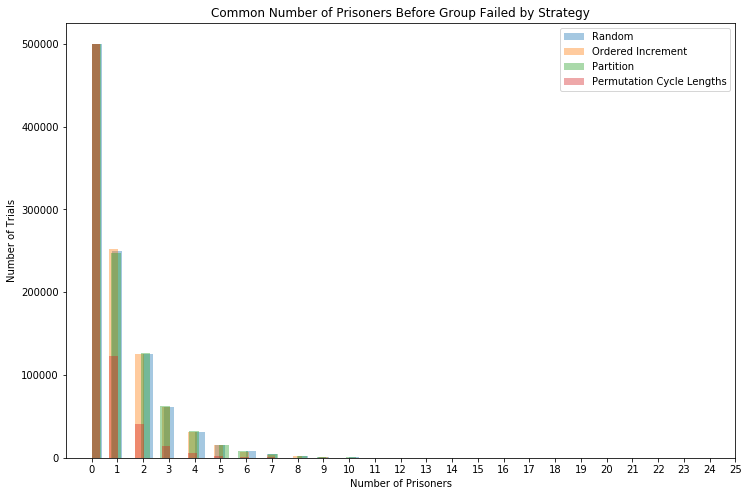

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(tuple(results_random), kde=False);
sns.distplot(tuple(results_order), kde=False);
sns.distplot(tuple(results_partition), kde=False);
sns.distplot(tuple(results_cycle), kde=False);

plt.legend(['Random', 'Ordered Increment', 'Partition', 'Permutation Cycle Lengths'])
plt.xlabel('Number of Prisoners')
plt.xticks(range(26))
plt.ylabel('Number of Trials')
plt.title('Common Number of Prisoners Before Group Failed by Strategy');

<font size="5">Interpreting the Histogram</font>

Well, even with as many trials as we had, it seems most teams don't make it very far. The number of teams losing at a certain point seem pretty equal across each group -- but let's take a look at actual counts to be sure

In [12]:
print('Random: ', Counter(results_random), '\n')
print('Ordered: ', Counter(results_order), '\n')
print('Partitioned: ', Counter(results_partition), '\n')
print('Cycled: ', Counter(results_cycle), '\n')

Random:  Counter({0: 499922, 1: 250053, 2: 125543, 3: 61952, 4: 31344, 5: 15420, 6: 7877, 7: 4007, 8: 1936, 9: 972, 10: 515, 11: 235, 12: 115, 13: 52, 14: 27, 15: 14, 16: 5, 17: 5, 18: 4, 19: 1, 20: 1}) 

Ordered:  Counter({0: 500222, 1: 252534, 2: 125842, 3: 61954, 4: 30992, 5: 14872, 6: 7077, 7: 3496, 8: 1575, 9: 781, 10: 347, 11: 177, 12: 77, 13: 30, 14: 11, 15: 5, 16: 5, 17: 3}) 

Partitioned:  Counter({0: 499492, 1: 246969, 2: 126531, 3: 63012, 4: 31927, 5: 15893, 6: 8053, 7: 4009, 8: 2032, 9: 1051, 10: 481, 11: 256, 12: 162, 13: 65, 14: 37, 15: 16, 16: 6, 18: 5, 17: 2, 19: 1}) 

Cycled:  Counter({0: 499451, 1: 123316, 2: 40773, 3: 14761, 4: 5746, 5: 2207, 6: 906, 7: 370, 8: 131, 9: 60, 10: 23, 12: 6, 11: 4, 13: 3, 17: 1, 15: 1}) 



<font size="5">Counting how 'far' teams went</font>

If permutation cycles have such a high number of wins (and the only wins), why aren't they're more teams making it to, say, 20 or 30 prisoners before failing? They seem to fail faster than any other group

In [13]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/f/f6/Permutation_longest_cycle_length_pmf_qtl2.svg")

The graph above (from wikipedia) shows how often a cycle of a certain length with appear in a random permutation of 100 numbers. As we can see, the most 'likely' maximum cycle length to appear is at 50, which happens to be the number of guesses we have. Since we win with any maximum length of 50 and short, we would add up the green area to calculate the probability a team would win.  If a cycle length longer than 50 occurs (any of the red area), the group will lose

Even a cycle length of 100 out of 100 is possible (about 1% of the time), so this of course isn't a full-proof strategy even if we allow for more guesses, as we'll see later

<font size="6">Always the best strategy?</font>

A typical way of dealing with combinatorial problems is to break them down into something more manageable for us humans to think about. If we do that here, is there a chance we'll be lead astray? For instance, if we simplify the problem and say there are only 4 prisoners and 2 guesses each, will these results still hold--will permutation cycles be the way to go?

Wall time: 9min 6s


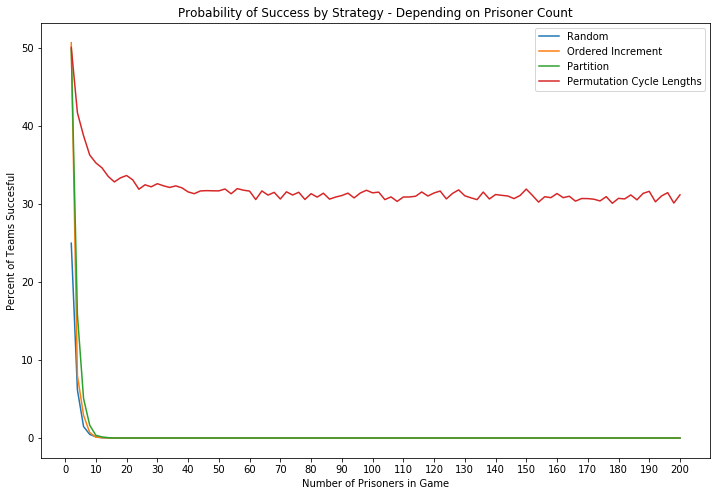

In [14]:
%%time
nbr_of_trials = 10000
start = 2
stop = 201

plt.figure(figsize=(12,8))

for strategy in ('random', 'order','partition', 'cycle'):
    result = [100*(nbr_of_trials - len(simulate_a_strategy(strategy, nbr_of_trials, nbr_of_prisoners, nbr_of_prisoners, nbr_of_prisoners//2)))/nbr_of_trials for nbr_of_prisoners in range(start,stop,2)]
    plt.plot(list(range(start,stop,2)), result)
    
plt.legend(['Random', 'Ordered Increment', 'Partition', 'Permutation Cycle Lengths'])
plt.xlabel('Number of Prisoners in Game')
plt.xticks(range(0,stop,10))
plt.ylabel('Percent of Teams Succesful')
plt.title('Probability of Success by Strategy - Depending on Prisoner Count');

<font size="5">And the winner is. . .</font>

It looks like the Permutation Cycle Lengths is the winner no matter which strategy we choose. But let's 'zoom in' so to speak, and run more trials just to be sure


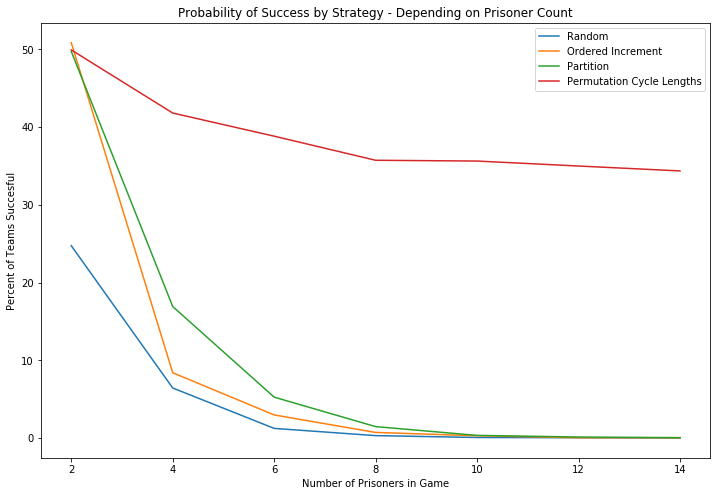

In [15]:
nbr_of_trials = 10000
start = 2
stop = 16

plt.figure(figsize=(12,8))

for strategy in ('random', 'order','partition', 'cycle'):
    result = [100*(nbr_of_trials - len(simulate_a_strategy(strategy, nbr_of_trials, nbr_of_prisoners, nbr_of_prisoners, nbr_of_prisoners//2)))/nbr_of_trials for nbr_of_prisoners in range(start,stop,2)]
    plt.plot(list(range(start,stop,2)), result)
    
plt.legend(['Random', 'Ordered Increment', 'Partition', 'Permutation Cycle Lengths'])
plt.xlabel('Number of Prisoners in Game')
plt.xticks(range(2,stop,2))
plt.ylabel('Percent of Teams Succesful')
plt.title('Probability of Success by Strategy - Depending on Prisoner Count');

<font size="5">More on the Partitioning Strategy</font>

It's pretty clear what the order of best stratgies are: Permutation-Cycles; Partitioning; Ordering; Random

A follow-up question might be. . . why is partitioning any better than ordering? They should both lead to all boxes being checked twice.

What's happening is this:
Imagine prisoner 1 checks his/her 50 boxes and is successful. Then that means when prisoner 2 checks boxes 51-100, they know that at the very least, prisoner 1's object is not in his/her group of 50. So, the conditional probability of success on the next try is 50/99, not 50/100.

When prisoner 3 goes, the same logic holds when they check 1-50 again, but they know they are wasting a guess because prisoner 1 found their item. So the chances are 49/98 = 1/2

Lets take a look at what this means

In [16]:
a = 50
b = 50
probability = (1/2)
probability_hist = [0.5]

for i in range(1,100):
    if i % 2 == 0:
        a -= 1
        probability *= (b /(a+b))
        probability_hist.append((b /(a+b)))
    else:
        b -= 1
        probability *= (a /(a+b))
        probability_hist.append((a /(a+b)))
        
prob_of_success_from_point = []
for i in range(len(probability_hist)):
    probability = 1
    for j in probability_hist[i:]:
        probability *= j
        
    prob_of_success_from_point.append(probability)

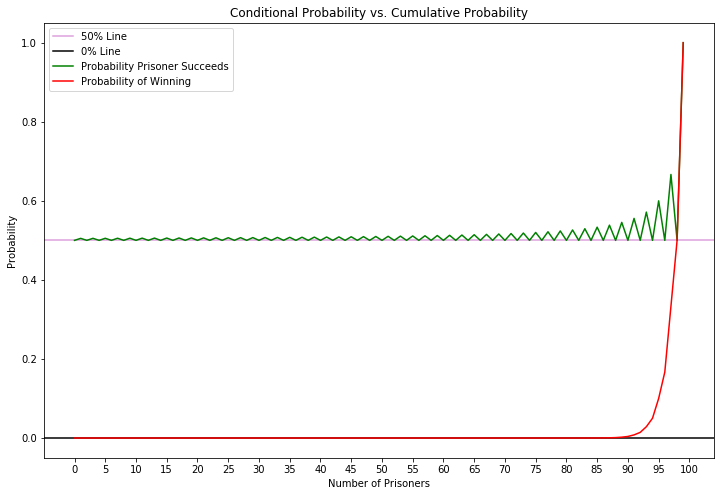

In [17]:
plt.figure(figsize=(12,8))
plt.axhline(y=0.5, color='plum', linestyle='-')
plt.axhline(y=0.0, color='black', linestyle='-')
plt.xticks(range(0,101,5))
plt.plot(probability_hist, color='green');
plt.plot(prob_of_success_from_point, color='red');
plt.xlabel('Number of Prisoners')
plt.ylabel('Probability')
plt.legend(['50% Line', '0% Line', 'Probability Prisoner Succeeds', 'Probability of Winning'])
plt.title('Conditional Probability vs. Cumulative Probability');

<font size="5">Interpreting the Chart</font>

Looking at this chart tells us two things. First, every even number guess has a 1/2 chance of succeeding [it would be every odd number in the puzzle, but python is indexed on 0, not 1]. It also shows us that that as we take more successful guesses, are conditional probability of getting the next odd-numbered guess grows.

Think about it like this. If you were the last person to go with this strategy and everybody before you was successfull, then you have a 100% chance, because every other number was found. 

So, the 100th prisoner has a 100% chance
the 99th has a 50% chance
the 98th has ~66% chance


<font size="6">Changing the number of guesses</font>

Ok--so it looks like we've shown relying on cycle lengths (permutation cycles) is a reliable strategy regardless if we have a few prisoners or many. But what if we vary the number of guesses -- will it continue to be our champion strategy?

Let's test and find out!

We will use 100 prisoners and 100 boxes, and vary the number of guesses they each get from 1 all the way up to 100 

Wall time: 1min 28s


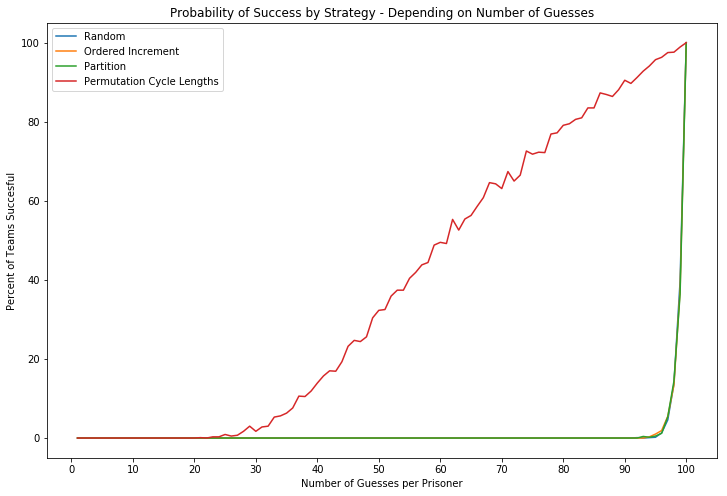

In [18]:
%%time
nbr_of_trials = 1000
start = 1
stop = 101

plt.figure(figsize=(12,8))
#nbr_of_trials, nbr_of_prisoners, nbr_of_objects, nbr_of_guesses)
for strategy in ('random', 'order','partition', 'cycle'):
    result = [100*(nbr_of_trials - len(simulate_a_strategy(strategy, nbr_of_trials, 100, 100, nbr_of_guesses)))/nbr_of_trials for nbr_of_guesses in range(start,stop)]
    plt.plot(list(range(start,stop,1)), result)
    
plt.legend(['Random', 'Ordered Increment', 'Partition', 'Permutation Cycle Lengths'])
plt.xlabel('Number of Guesses per Prisoner')
plt.xticks(range(0,stop,10))
plt.ylabel('Percent of Teams Succesful')
plt.title('Probability of Success by Strategy - Depending on Number of Guesses');

Wall time: 27.8 s


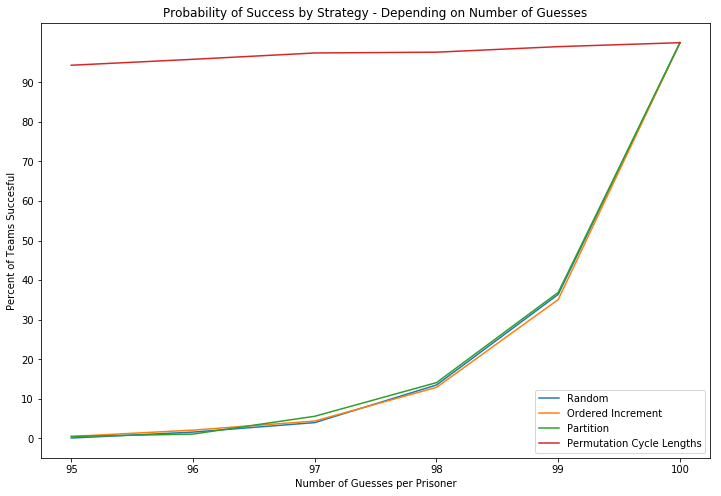

In [19]:
%%time
nbr_of_trials = 1000
start = 95
stop = 101

plt.figure(figsize=(12,8))
#nbr_of_trials, nbr_of_prisoners, nbr_of_objects, nbr_of_guesses)
for strategy in ('random', 'order','partition', 'cycle'):
    result = [100*(nbr_of_trials - len(simulate_a_strategy(strategy, nbr_of_trials, 100, 100, nbr_of_guesses)))/nbr_of_trials for nbr_of_guesses in range(start,stop)]
    plt.plot(list(range(start,stop,1)), result)
    
plt.legend(['Random', 'Ordered Increment', 'Partition', 'Permutation Cycle Lengths'])
plt.xlabel('Number of Guesses per Prisoner')
plt.xticks(range(95,stop,1))
plt.yticks(range(0,100,10))
plt.ylabel('Percent of Teams Succesful')
plt.title('Probability of Success by Strategy - Depending on Number of Guesses');

<font size="5">Other strategies. . . just don't work</font>

Even with 99 guesses, you're less likely to succeed with any other strategy than relying on permutation cycle lengths. No other strategy breaks 50%, even though the permutation cycle lengths will beat that probability at around 60 guesses. 

Perhaps more shockingly, even the other strategies with access to 96 guesses perform about on par with the cycle-lengths with only 30 guesses! Those extra 65+ guesses don't seem to buy much improvement